In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
PATH =  "ashrae-energy-prediction/"

In [2]:
train_df = pd.read_pickle(PATH + "train.pkl")

In [3]:
def target_encoding(train_df,train_target_df,test_df,kf,encoding_columns):
    for column in encoding_columns:
        encoding_df = pd.DataFrame({
            "explain":train_df[column],
            "target":train_target_df
        })
        # encoding test_df
        # calculating mean grouped by explain variable 
        target_mean_arr = encoding_df.groupby("explain").mean()["target"]
        test_df[column] = test_df[column].map(target_mean_arr)
        # encoding train_df
        train_explain= np.repeat(np.nan,encoding_df.shape[0])
        for i1,i2 in kf.split(train_df):
            target_mean_arr_train = encoding_df.iloc[i1].groupby("explain").mean()["target"]
            train_explain[i2] = train_df.iloc[i2][column].map(target_mean_arr_train)
        train_df[column] = train_explain

In [4]:
test_df = pd.read_pickle(PATH + "test.pkl")

In [5]:
train_df.drop("timestamp",axis = 1,inplace = True)
test_df.drop("timestamp",axis = 1,inplace = True)

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 4,random_state = 1)

In [7]:
target_encoding(train_df,train_df.meter_reading,test_df,kf,["primary_use"])

In [17]:
train_target = train_df.meter_reading
train_df.drop("meter_reading",axis = 1,inplace = True)

In [18]:
from sklearn.model_selection import train_test_split
X_train ,X_test = train_test_split(train_df,test_size = 0.4,random_state = 1)
y_train,y_test = train_test_split(train_target,test_size = 0.4,random_state = 1)

# 訓練・テストデータの設定
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference= train_data)
params = {
    'objective': 'regression',
    "task":"train",
    "n_estimators":370,
    "learning_rate":0.05
    #"num_leaves":num_leaves
    }
gbm = lgb.train(
        params,
        train_data,
        valid_sets=eval_data,
        num_boost_round=100,
        verbose_eval=5
   )

/home/yada_yuki_entertainment/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's l2: 1.52995e+10
[10]	valid_0's l2: 1.07457e+10
[15]	valid_0's l2: 7.98037e+09
[20]	valid_0's l2: 6.34013e+09
[25]	valid_0's l2: 5.32422e+09
[30]	valid_0's l2: 4.65562e+09
[35]	valid_0's l2: 4.23849e+09
[40]	valid_0's l2: 3.97222e+09
[45]	valid_0's l2: 3.76321e+09
[50]	valid_0's l2: 3.62413e+09
[55]	valid_0's l2: 3.51699e+09
[60]	valid_0's l2: 3.43255e+09
[65]	valid_0's l2: 3.35228e+09
[70]	valid_0's l2: 3.29447e+09
[75]	valid_0's l2: 3.24767e+09
[80]	valid_0's l2: 3.22553e+09
[85]	valid_0's l2: 3.20048e+09
[90]	valid_0's l2: 3.17683e+09
[95]	valid_0's l2: 3.14876e+09
[100]	valid_0's l2: 3.12858e+09
[105]	valid_0's l2: 3.10728e+09
[110]	valid_0's l2: 3.0964e+09
[115]	valid_0's l2: 3.09527e+09
[120]	valid_0's l2: 3.09183e+09
[125]	valid_0's l2: 3.08952e+09
[130]	valid_0's l2: 3.08455e+09
[135]	valid_0's l2: 3.08345e+09
[140]	valid_0's l2: 3.0794e+09
[145]	valid_0's l2: 3.07778e+09
[150]	valid_0's l2: 3.07046e+09
[155]	valid_0's l2: 3.06707e+09
[160]	valid_0's l2: 3.06326e+0

16
16


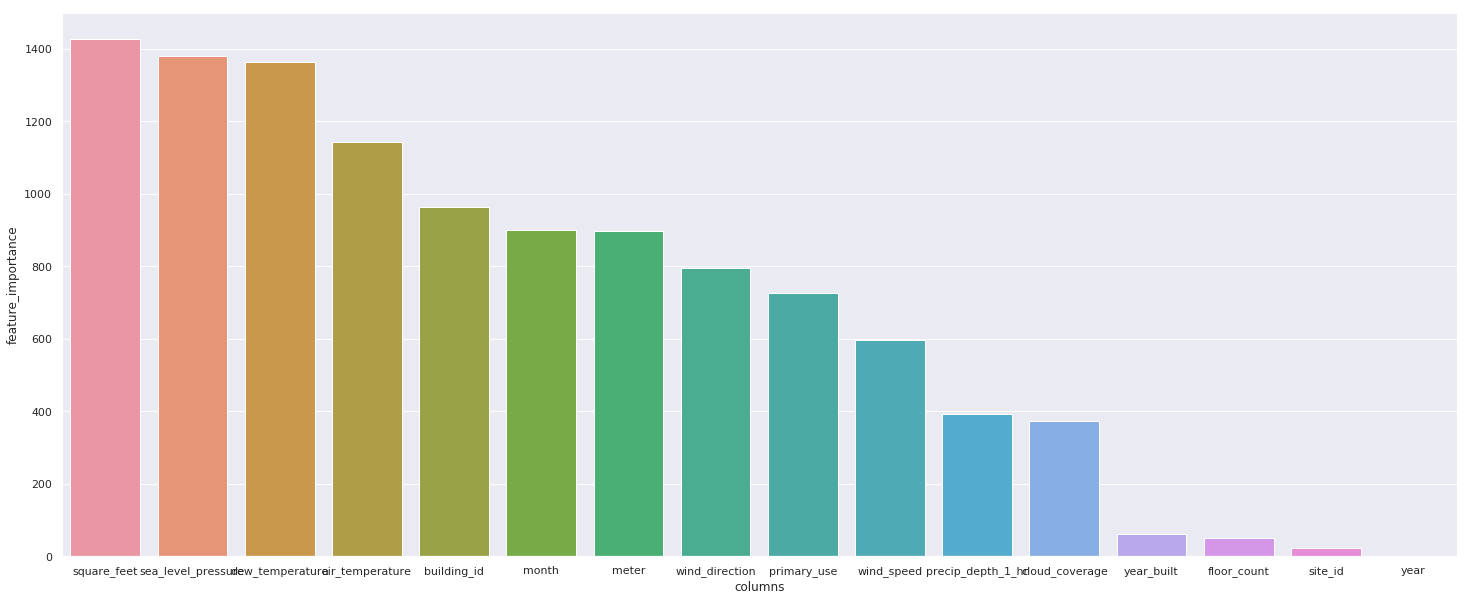

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
print(len(train_df.columns))
print(len(gbm.feature_importance()))
feature_importance_df = pd.DataFrame({
    "columns":train_df.columns,
    "feature_importance":gbm.feature_importance()
})
sns.set()
sns.set_context("notebook")
plt.figure(figsize=(25, 10))
sns.barplot(y="feature_importance", x="columns",data=feature_importance_df.sort_values('feature_importance',ascending=False))

In [15]:
%%javascript
var notebook_name = document.body.attributes['data-notebook-name'].value
IPython.notebook.kernel.execute(`NOTEBOOK_NAME = '${notebook_name}'`);

<IPython.core.display.Javascript object>

In [23]:
import pickle
from datetime import datetime
with open(NOTEBOOK_NAME + '_model.pickle', mode='wb') as fp:
    pickle.dump(gbm, fp)

In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [26]:
import gc
gc.collect()

23

In [28]:
import pandas as pd

In [10]:
train_df.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0,0.0,0,4290.770736,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
1,1,0,0.0,0,4290.770736,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
2,2,0,0.0,0,4290.770736,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
3,3,0,0.0,0,4290.770736,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016
4,4,0,0.0,0,4290.770736,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,2016


In [8]:
test_df.head()

,building_id,meter,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,year
0,0,0,0,4585.09184,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,1,2017
1,1,0,0,4585.09184,2720,2004.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,1,2017
2,2,0,0,4585.09184,5376,1991.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,1,2017
3,3,0,0,4585.09184,23685,2002.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,1,2017
4,4,0,0,4585.09184,116607,1975.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6,1,2017


In [16]:
del train_df


NameError: name 'train_target' is not defined

In [17]:
import gc
gc.collect()

82

In [20]:
import pickle
with open("Untitled.ipynb_model.pickle", mode='rb') as fp:
    gbm= pickle.load(fp)

In [21]:
predict =gbm.predict(test_df)

In [24]:
def generate_submission(id_name,test_id,target_name,prediction,NOTEBOOK_NAME,add_word = ""):
    from datetime import datetime
    submission_data = pd.DataFrame({id_name: test_id, target_name: prediction})
    submission_file = 'sub_'+ NOTEBOOK_NAME+ '_' + str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S')) + '_'+add_word+'.csv'
    submission_data.to_csv(submission_file, index=False)
    print("file_name = " , submission_file)
    print(submission_data.head())

In [25]:
generate_submission("row_id",test_df.index,"meter_reading",predict,NOTEBOOK_NAME,add_word = "TF")

file_name =  sub_2_lgbm.ipynb_2019-10-25_10-55-31_First.csv
   row_id  meter_reading
0       0     124.385476
1       1     100.444598
2       2      77.322534
3       3     100.444598
4       4     310.199947
